![](Logo.jpg)

<div style = " Text-align: center">
    
# Analisis de Datos Masivos

## COVID-19-MX

### Rodriguez Rivas Jose Gabriel

## Garcia Alarcon Jesus Eduardo
## Esquivel Martinez Gerardo Jael

</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
corona = pd.read_csv("200809COVID19MEXICO.csv", encoding= 'unicode_escape')

In [3]:
corona['SOBREVIVIO'] = corona['FECHA_DEF'].apply(lambda toLabel: 0 if toLabel =='9999-99-99' else 1)

In [4]:
corona.drop(['ORIGEN','SECTOR','ENTIDAD_UM','ENTIDAD_NAC','ENTIDAD_RES','MUNICIPIO_RES','FECHA_INGRESO',
             'FECHA_SINTOMAS','FECHA_DEF','HABLA_LENGUA_INDIG','MIGRANTE','PAIS_NACIONALIDAD','PAIS_ORIGEN',
            'FECHA_ACTUALIZACION','ID_REGISTRO','OTRO_CASO'],
            axis=1, inplace = True)

In [5]:
corona.drop(['NACIONALIDAD'],axis=1, inplace = True)

In [6]:
corona.head()

,SEXO,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI,SOBREVIVIO
0,1,1,97,2,63,2,2,2,2,2,1,2,2,2,2,2,1,97,0
1,2,1,97,2,27,97,2,2,2,2,2,2,2,2,2,2,1,97,0
2,1,2,2,2,61,2,2,2,2,2,1,2,2,2,2,2,1,2,0
3,1,1,97,1,27,2,2,2,2,2,2,2,2,2,2,2,1,97,0
4,2,2,1,1,47,97,2,2,2,2,2,2,2,1,2,2,1,2,1


In [7]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091695 entries, 0 to 1091694
Data columns (total 19 columns):
SEXO              1091695 non-null int64
TIPO_PACIENTE     1091695 non-null int64
INTUBADO          1091695 non-null int64
NEUMONIA          1091695 non-null int64
EDAD              1091695 non-null int64
EMBARAZO          1091695 non-null int64
DIABETES          1091695 non-null int64
EPOC              1091695 non-null int64
ASMA              1091695 non-null int64
INMUSUPR          1091695 non-null int64
HIPERTENSION      1091695 non-null int64
OTRA_COM          1091695 non-null int64
CARDIOVASCULAR    1091695 non-null int64
OBESIDAD          1091695 non-null int64
RENAL_CRONICA     1091695 non-null int64
TABAQUISMO        1091695 non-null int64
RESULTADO         1091695 non-null int64
UCI               1091695 non-null int64
SOBREVIVIO        1091695 non-null int64
dtypes: int64(19)
memory usage: 158.3 MB


In [8]:
#Declaramos los valores de los intervalos
rangosedad = [0,10,20,30,40,50,60,70,80,90,100]
rangos = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
corona['RangoEdad'] =pd.cut(corona['EDAD'], rangosedad,labels=rangos)

In [9]:
#Agrupamos los rangos de edad con el sexo y el total de cada uno
df_edades = corona.groupby(['RangoEdad','SEXO']).size().reset_index(name='Total')
df_edades

,RangoEdad,SEXO,Total
0,0-10,1,9699
1,0-10,2,10839
2,11-20,1,22865
3,11-20,2,21202
4,21-30,1,108542
5,21-30,2,97530
6,31-40,1,133120
7,31-40,2,125835
8,41-50,1,118020
9,41-50,2,113719


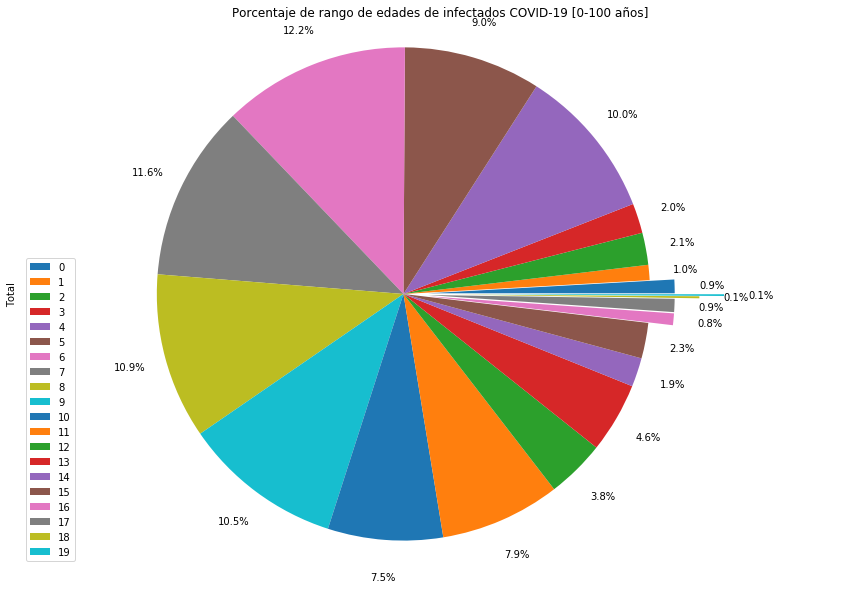

In [10]:
explode_list=[0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.1,0.2,0.3]
df_edades['Total'].plot(kind='pie',
                            figsize= (15,10),
                            autopct='%1.1f%%',
                            startangle=0,
                            shadow=False,
                            labels=None,
                            pctdistance=1.15,
                            explode =explode_list) 
plt.title('Porcentaje de rango de edades de infectados COVID-19 [0-100 años]')
plt.axis('equal')
plt.legend(labels=df_edades.index, loc='lower left')
plt.show()

#### Caracteristicas Estadisticas Basicas:
#### Media, Desviacion Estandar, Rango, Mediana, Minimo, Maximo, Cuartiles 0.25 y 0.75

In [11]:
medidas = pd.read_csv("200809COVID19MEXICO.csv", encoding= 'unicode_escape')

In [12]:
medidas.drop(['ORIGEN','SECTOR','ENTIDAD_UM','SEXO','ENTIDAD_NAC','ENTIDAD_RES','MUNICIPIO_RES','FECHA_INGRESO',
             'FECHA_SINTOMAS','FECHA_DEF','HABLA_LENGUA_INDIG','MIGRANTE','PAIS_NACIONALIDAD','PAIS_ORIGEN',
            'FECHA_ACTUALIZACION','ID_REGISTRO','OTRO_CASO','TIPO_PACIENTE','INTUBADO','NEUMONIA','NACIONALIDAD','EMBARAZO','DIABETES','EPOC','ASMA','INMUSUPR','HIPERTENSION','OTRA_COM','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA','TABAQUISMO','RESULTADO','UCI'],
            axis=1, inplace = True)

In [13]:
medidas.head()

,EDAD
0,63
1,27
2,61
3,27
4,47


In [14]:
media = corona["EDAD"].mean()
mediana = corona["EDAD"].median()
moda = corona["EDAD"].mode()
print("""
    Media: %d
    Mediana: %d
    Moda: %d
""" % (media,mediana,moda))


    Media: 42
    Mediana: 41
    Moda: 30



In [15]:
medidas.tail()

,EDAD
1091690,55
1091691,56
1091692,44
1091693,50
1091694,34


In [16]:
# Características estadísticas básicas:
# Media, desviación estándar, rango, mediana,minimo,maximo, cuartiles 0.25 y 0.75
medidas.describe()

,EDAD
count,1.091695e+06
mean,4.248260e+01
std,1.667670e+01
min,0.000000e+00
25%,3.000000e+01
50%,4.100000e+01
75%,5.300000e+01
max,1.200000e+02


In [17]:
#Redondeamos los datos
medidas['rounded'] = medidas.EDAD.round(2)
medidas.head()

,EDAD,rounded
0,63,63
1,27,27
2,61,61
3,27,27
4,47,47


In [18]:
count = medidas['rounded'].count()
mean = medidas['rounded'].mean()
median = medidas['rounded'].median()
std = medidas['rounded'].std()
rng = medidas['rounded'].max() - medidas['rounded'].min()

In [19]:
countstring = "El numero de observaciones es {}, en el conjunto de datos".format(count)
countstring

'El numero de observaciones es 1091695, en el conjunto de datos'

In [20]:
meanstring = "La media de la distribucion es {}, y la mediana es {} en el conjunto de datos".format(mean,median)
meanstring

'La media de la distribucion es 42.48259816157443, y la mediana es 41.0 en el conjunto de datos'

In [21]:
stdstring = "La desviacion estandar es {:.2f}, para el conjunto de datos".format(std)
stdstring

'La desviacion estandar es 16.68, para el conjunto de datos'

In [22]:
maxminstring = "El valor minimo es {}, el valor maximo es {}".format(medidas.rounded.min(), medidas.rounded.max())
maxminstring

'El valor minimo es 0, el valor maximo es 120'

In [23]:
rangestring = "El rango es {:.2f}, en el conjunto de valores ".format(rng)
rangestring

'El rango es 120.00, en el conjunto de valores '

In [24]:
freq = medidas['rounded'].value_counts()
freq = freq.to_frame().reset_index()
freq

,index,rounded
0,30,28123
1,31,26855
2,34,26091
3,36,26039
4,37,26027
...,...,...
116,115,2
117,116,1
118,113,1
119,111,1


In [25]:
freq.columns = ['value','freq']
freq.head()

,value,freq
0,30,28123
1,31,26855
2,34,26091
3,36,26039
4,37,26027


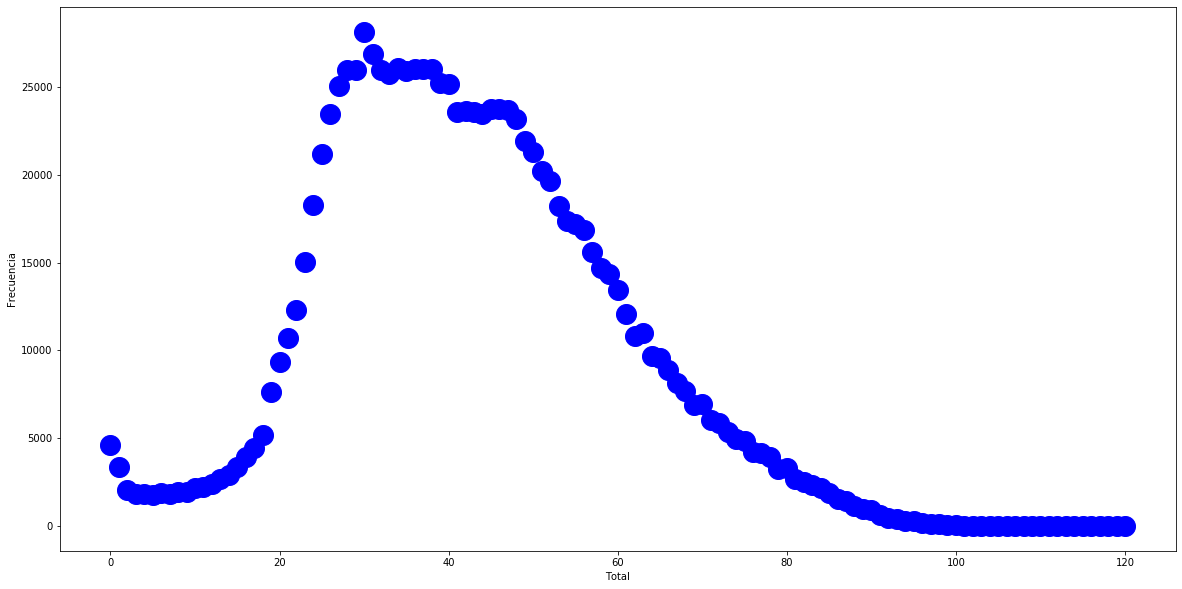

In [26]:
#Grafica de distribucion de frecuencia
plt.figure(figsize=(20,10))
plt.ylabel('Frecuencia')
plt.xlabel('Total')
plt.plot(freq.value,freq.freq, "o", markersize = 20, color = 'b')

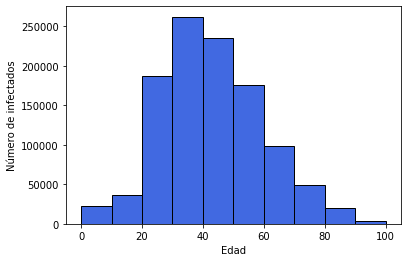

In [27]:
#Grafica que muestra el numero de infectados por edad
plt.hist(corona['EDAD'], bins=10, range=(0,100), color='royalblue', histtype='bar', ec='black')
plt.xlabel('Edad')
plt.ylabel('Número de infectados')
plt.show()

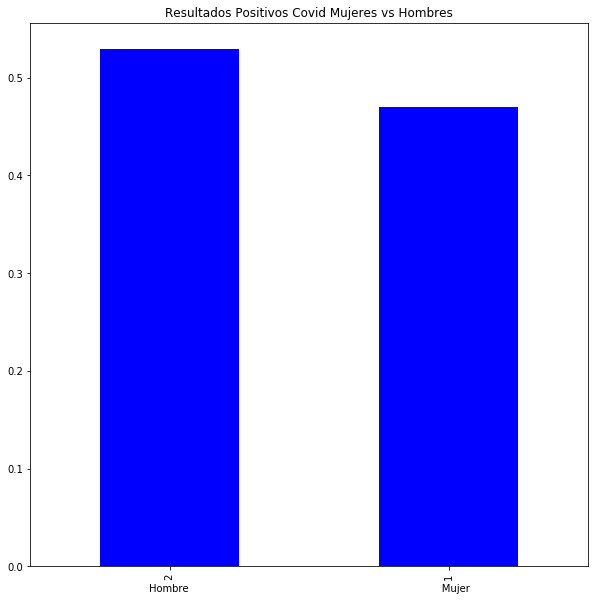

In [28]:
#Grafica que muestra que sexo tiene mas casos positivos a covid 19
fig = plt.figure(figsize=(10,10))
corona.SEXO[corona.RESULTADO == 1].value_counts(normalize = True).plot(kind='bar',alpha=1, color='blue')
plt.title('Resultados Positivos Covid Mujeres vs Hombres')
plt.xlabel('Hombre                                                                                 Mujer')
plt.show()

In [29]:
#Hacemos un dataframe de genero para poder agrupor por sexo
df_genero = corona.groupby('SEXO', axis=0).sum()
df_genero.head()

,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI,SOBREVIVIO
SEXO,,,,,,,,,,,,,,,,,,
1,632526,45207942,1037997,22981007,1435158,1162593,1203281,1192032,1217704,1129763,1269744,1206312,1124745,1204866,1190558,912811,45208227,24272
2,665659,41066723,998471,23397033,52696705,1194437,1235076,1229303,1248857,1161204,1320297,1234082,1157217,1232832,1198433,874807,41067779,42893


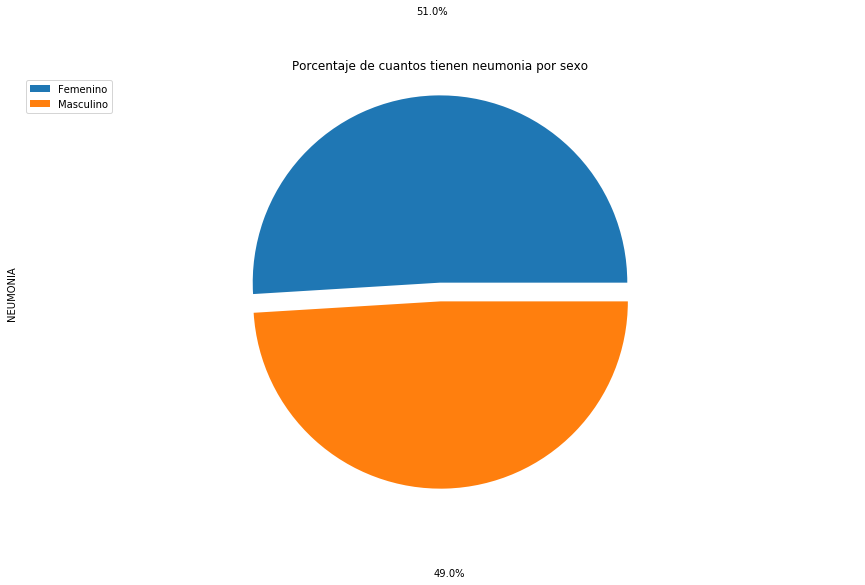

In [30]:
#Grafica que muestra los resultados de cuantos tienen Neumonia por sexo
explode_list=[0.0, 0.1]
df_genero['NEUMONIA'].plot(kind='pie',
                            figsize= (15,8),
                            autopct='%1.1f%%',
                            startangle=0,
                            shadow=False,
                            labels=None,
                            pctdistance=1.45,
                            explode =explode_list) 
plt.title('Porcentaje de cuantos tienen neumonia por sexo')
plt.axis('equal')
plt.legend(labels=('Femenino', 'Masculino'),loc= 'upper left')
plt.show()

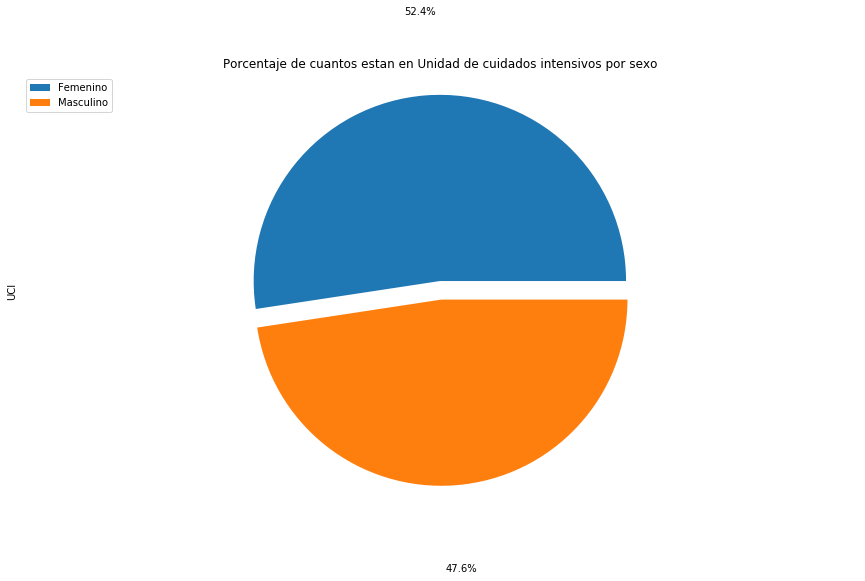

In [31]:
#Grafica que muestra los resultados de cuantos estan en UCI (Unidad de Cuidados Intensivos) por sexo
explode_list=[0.0, 0.1]
df_genero['UCI'].plot(kind='pie',
                            figsize= (15,8),
                            autopct='%1.1f%%',
                            startangle=0,
                            shadow=False,
                            labels=None,
                            pctdistance=1.45,
                            explode =explode_list) 
plt.title('Porcentaje de cuantos estan en Unidad de cuidados intensivos por sexo')
plt.axis('equal')
plt.legend(labels=('Femenino', 'Masculino'),loc= 'upper left')
plt.show()

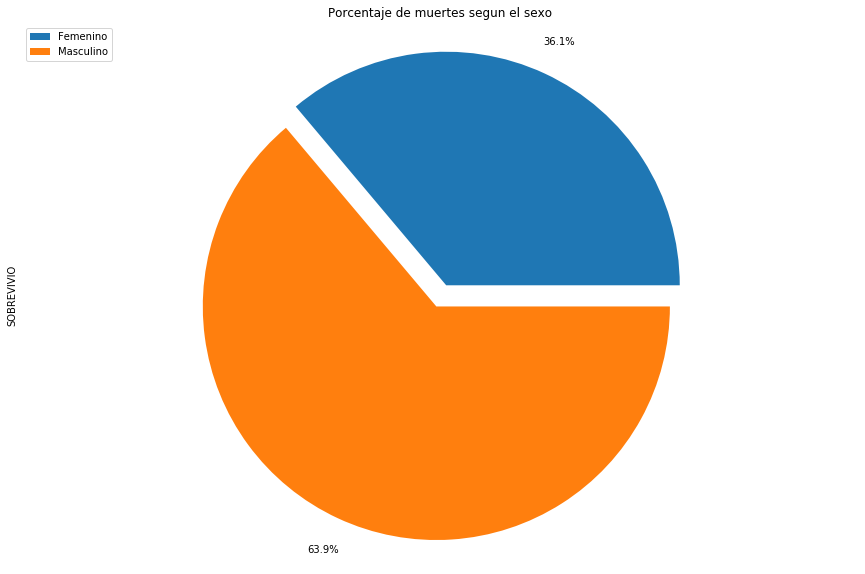

In [32]:
#Grafica que muestra que sexo tiene mas muertes
explode_list=[0.0, 0.1]
df_genero['SOBREVIVIO'].plot(kind='pie',
                            figsize= (15,10),
                            autopct='%1.1f%%',
                            startangle=0,
                            shadow=False,
                            labels=None,
                            pctdistance=1.15,
                            explode =explode_list) 
plt.title('Porcentaje de muertes segun el sexo')
plt.axis('equal')
plt.legend(labels=('Femenino', 'Masculino'),loc= 'upper left')
plt.show()

In [33]:
#Numero de mujeres en el data set
df_mujeres= corona.SEXO[corona.SEXO == 1].count()
df_mujeres

548430

In [34]:
#Numero de hombres en el data set
df_hombres= corona.SEXO[corona.SEXO == 2].count()
df_hombres

543265

In [35]:
#Correlacion que hay en los datos
#El style.background_gradient es el color del fondo y el format son los numeros despues del punto
corona.corr().style.background_gradient(cmap='Reds').format("{:.3f}")

,SEXO,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI,SOBREVIVIO
SEXO,1.000,0.092,-0.092,-0.053,0.035,0.993,0.008,0.008,0.009,0.008,0.008,0.009,0.007,0.008,0.007,0.003,-0.044,-0.092,0.072
TIPO_PACIENTE,0.092,1.000,-1.000,-0.434,0.326,0.090,0.000,0.013,0.016,0.016,-0.001,0.032,0.016,0.012,0.013,0.016,-0.144,-1.000,0.461
INTUBADO,-0.092,-1.000,1.000,0.435,-0.326,-0.090,-0.000,-0.013,-0.016,-0.016,0.001,-0.032,-0.016,-0.012,-0.013,-0.016,0.144,1.000,-0.461
NEUMONIA,-0.053,-0.434,0.435,1.000,-0.188,-0.052,-0.002,-0.009,-0.010,-0.011,-0.001,-0.023,-0.010,-0.008,-0.008,-0.010,0.095,0.434,-0.287
EDAD,0.035,0.326,-0.326,-0.188,1.000,0.034,-0.003,0.011,0.016,0.016,-0.013,0.017,0.013,0.009,0.014,0.015,-0.113,-0.326,0.292
EMBARAZO,0.993,0.090,-0.090,-0.052,0.034,1.000,0.013,0.014,0.015,0.013,0.013,0.014,0.013,0.014,0.013,0.009,-0.043,-0.090,0.071
DIABETES,0.008,0.000,-0.000,-0.002,-0.003,0.013,1.000,0.831,0.832,0.793,0.838,0.653,0.813,0.767,0.811,0.773,0.004,-0.000,0.003
EPOC,0.008,0.013,-0.013,-0.009,0.011,0.014,0.831,1.000,0.916,0.870,0.862,0.711,0.890,0.833,0.889,0.845,-0.002,-0.013,0.016
ASMA,0.009,0.016,-0.016,-0.010,0.016,0.015,0.832,0.916,1.000,0.885,0.871,0.718,0.900,0.843,0.900,0.855,-0.002,-0.016,0.017
INMUSUPR,0.008,0.016,-0.016,-0.011,0.016,0.013,0.793,0.870,0.885,1.000,0.838,0.750,0.870,0.813,0.867,0.824,-0.003,-0.016,0.017


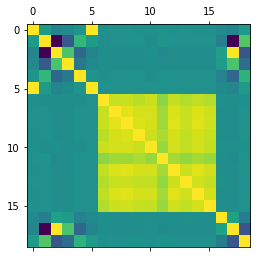

In [36]:
#Grafico de la matriz de correlacion
plt.matshow(corona.corr())

#### Neumonia

In [37]:
#Agrupamos por neumonia
df_neumonia = corona.groupby('NEUMONIA', axis=0).sum()
df_neumonia.head()

,SEXO,TIPO_PACIENTE,INTUBADO,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI,SOBREVIVIO
NEUMONIA,,,,,,,,,,,,,,,,,,
1,237503,271874,2687984,8060941,8766226,326461,355081,356954,367265,315013,429848,359759,333165,353757,354030,210336,2690365,47747
2,1397431,1026293,83585030,38316492,45364748,2030535,2083242,2064350,2099262,1975920,2160160,2080601,1948764,2083907,2034928,1577252,83583990,19418
99,26,18,1651,607,889,34,34,31,34,34,33,34,33,34,33,30,1651,0


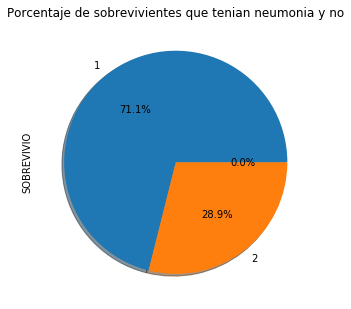

In [38]:
#Grafica que muestra los sobrevivientes que tienen neumonia y no
df_neumonia['SOBREVIVIO'].plot(kind='pie',
                            figsize= (5,6),
                            autopct='%1.1f%%',
                            startangle=0,
                            shadow=True)
plt.title('Porcentaje de sobrevivientes que tenian neumonia y no')
plt.show()

In [39]:
df_sobrevivio = corona.groupby('SOBREVIVIO', axis=0).sum()
df_sobrevivio.head()

,SEXO,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI
SOBREVIVIO,,,,,,,,,,,,,,,,,,
0,1524902,1170937,85471029,1949885,42245559,49916734,2207594,2268268,2250163,2292612,2148663,2394663,2268864,2125250,2269263,2219401,1703156,85467599
1,110058,127248,803636,86583,4132481,4215129,149436,170089,171172,173949,142304,195378,171530,156712,168435,169590,84462,808407


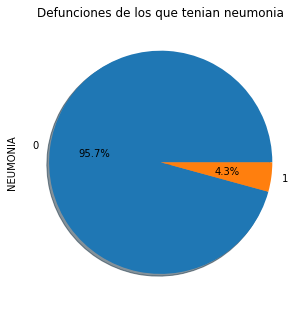

In [40]:
#Grafica que muestra las defunciones con neumonia
df_sobrevivio['NEUMONIA'].plot(kind='pie',
                            figsize= (5,6),
                            autopct='%1.1f%%',
                            startangle=0,
                            shadow=True)
plt.title('Defunciones de los que tenian neumonia')
plt.show()

#### Diabetes

In [41]:
#Se agrupa por diabetes
df_diabetes = corona.groupby('DIABETES', axis=0).sum()
df_diabetes.head()

,SEXO,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,EMBARAZO,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI,SOBREVIVIO
DIABETES,,,,,,,,,,,,,,,,,,
1,205749,198227,7234207,226935,7770552,6945496,276414,277647,284202,207918,316426,277759,249686,275038,276742,204976,7235038,25310
2,1424135,1095740,78822487,1803857,38453142,46987485,1914467,1896022,1934499,1826981,2026555,1916419,1802113,1919116,1871364,1577414,78822957,41434
98,5076,4218,217971,5676,154346,198882,247476,247666,247860,256068,247060,246216,230163,243544,240885,5228,218011,421


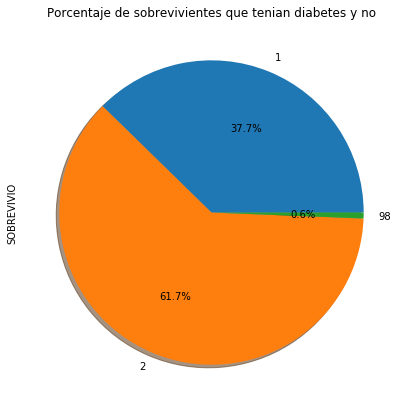

In [42]:
#Grafica que muestra los sobrevivientes que tienen diabetes y no
df_diabetes['SOBREVIVIO'].plot(kind='pie',
                            figsize= (7,7),
                            autopct='%1.1f%%',
                            startangle=0,
                            shadow=True)
plt.title('Porcentaje de sobrevivientes que tenian diabetes y no')
plt.show()

In [43]:
df_sobrevivio = corona.groupby('SOBREVIVIO', axis=0).sum()
df_sobrevivio.head()

,SEXO,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI
SOBREVIVIO,,,,,,,,,,,,,,,,,,
0,1524902,1170937,85471029,1949885,42245559,49916734,2207594,2268268,2250163,2292612,2148663,2394663,2268864,2125250,2269263,2219401,1703156,85467599
1,110058,127248,803636,86583,4132481,4215129,149436,170089,171172,173949,142304,195378,171530,156712,168435,169590,84462,808407


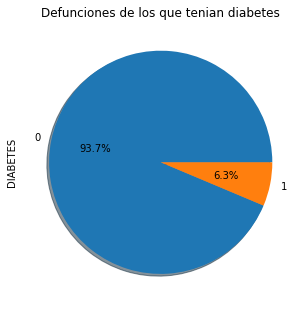

In [44]:
#Grafica que muestra las defunciones que tenian diabetes
df_sobrevivio['DIABETES'].plot(kind='pie',
                            figsize= (5,6),
                            autopct='%1.1f%%',
                            startangle=0,
                            shadow=True)
plt.title('Defunciones de los que tenian diabetes')
plt.show()

In [45]:
df_diabetes = corona.groupby('SEXO', axis=0).sum()
df_diabetes.head()

,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI,SOBREVIVIO
SEXO,,,,,,,,,,,,,,,,,,
1,632526,45207942,1037997,22981007,1435158,1162593,1203281,1192032,1217704,1129763,1269744,1206312,1124745,1204866,1190558,912811,45208227,24272
2,665659,41066723,998471,23397033,52696705,1194437,1235076,1229303,1248857,1161204,1320297,1234082,1157217,1232832,1198433,874807,41067779,42893


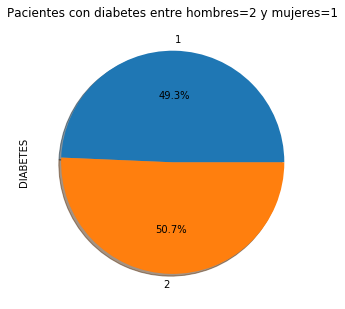

In [46]:
#Grafica que muestra por sexo el porcentaje que tiene diabetes
df_diabetes['DIABETES'].plot(kind='pie',
                            figsize= (5,6),
                            autopct='%1.1f%%',
                            startangle=0,
                            shadow=True)
plt.title('Pacientes con diabetes entre hombres=2 y mujeres=1')
plt.show()

#### Hipertension

In [47]:
#Se agrupa por hipertensión
df_hipertension = corona.groupby('HIPERTENSION', axis=0).sum()
df_hipertension.head()

,SEXO,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI,SOBREVIVIO
HIPERTENSION,,,,,,,,,,,,,,,,,,
1,267221,248472,10481413,304893,10198190,8909664,299052,358662,359052,372636,407491,358534,317075,355785,357335,273028,10482473,29274
2,1363057,1045817,75593261,1726344,36038337,45037216,1802337,1833576,1813674,1842821,1932431,1831146,1729786,1834255,1787590,1509771,75593478,37503
98,4682,3896,199991,5231,141513,184983,255641,246119,248609,251104,250119,250714,235101,247658,244066,4819,200055,388


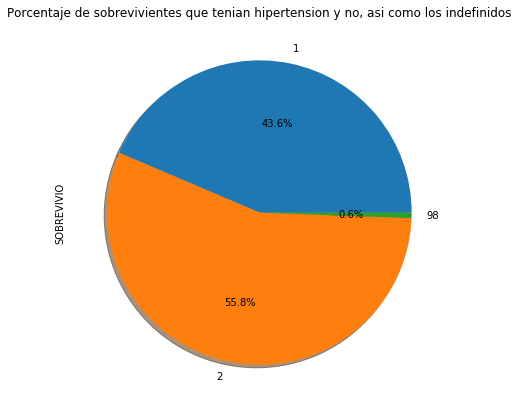

In [48]:
#Grafica que muestra los sobrevivientes que tienen diabetes y no
df_hipertension['SOBREVIVIO'].plot(kind='pie',
                            figsize= (7,7),
                            autopct='%1.1f%%',
                            startangle=0,
                            shadow=True)
plt.title('Porcentaje de sobrevivientes que tenian hipertension y no, asi como los indefinidos')
plt.show()

In [49]:
df_sobrevivio = corona.groupby('SOBREVIVIO', axis=0).sum()
df_sobrevivio.head()

,SEXO,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI
SOBREVIVIO,,,,,,,,,,,,,,,,,,
0,1524902,1170937,85471029,1949885,42245559,49916734,2207594,2268268,2250163,2292612,2148663,2394663,2268864,2125250,2269263,2219401,1703156,85467599
1,110058,127248,803636,86583,4132481,4215129,149436,170089,171172,173949,142304,195378,171530,156712,168435,169590,84462,808407


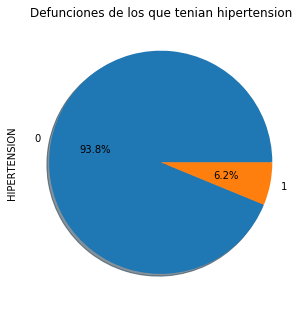

In [50]:
df_sobrevivio['HIPERTENSION'].plot(kind='pie',
                            figsize= (5,6),
                            autopct='%1.1f%%',
                            startangle=0,
                            shadow=True)
plt.title('Defunciones de los que tenian hipertension')
plt.show()

In [51]:
df_hipertension = corona.groupby('SEXO', axis=0).sum()
df_hipertension.head()

,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI,SOBREVIVIO
SEXO,,,,,,,,,,,,,,,,,,
1,632526,45207942,1037997,22981007,1435158,1162593,1203281,1192032,1217704,1129763,1269744,1206312,1124745,1204866,1190558,912811,45208227,24272
2,665659,41066723,998471,23397033,52696705,1194437,1235076,1229303,1248857,1161204,1320297,1234082,1157217,1232832,1198433,874807,41067779,42893


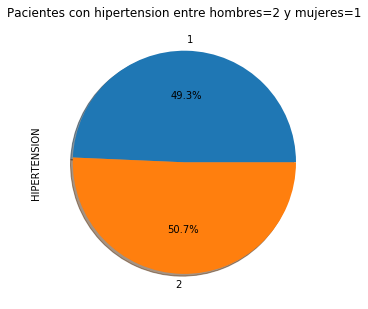

In [52]:
df_hipertension['HIPERTENSION'].plot(kind='pie',
                            figsize= (5,6),
                            autopct='%1.1f%%',
                            startangle=0,
                            shadow=True)
plt.title('Pacientes con hipertension entre hombres=2 y mujeres=1')
plt.show()

#### Obesidad

In [53]:
#Se agrupa por obesidad
df_obesidad = corona.groupby('OBESIDAD', axis=0).sum()
df_obesidad.head()

,SEXO,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI,SOBREVIVIO
OBESIDAD,,,,,,,,,,,,,,,,,,
1,257269,217179,12769604,314752,7942291,8301448,335310,358618,354736,366594,313197,395839,360124,359344,349471,269899,12769912,15538
2,1373248,1077265,73315472,1716760,38300973,45656050,1792229,1847035,1831213,1861788,1742897,1953447,1840089,1838066,1801210,1513166,73316453,51232
98,4443,3741,189589,4956,134776,174365,229491,232704,235386,238179,234873,240755,240181,240288,238310,4553,189641,395


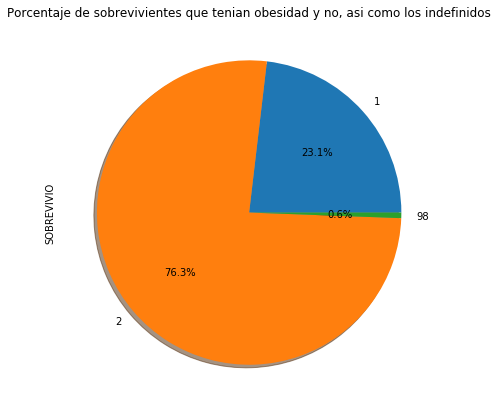

In [54]:
#Grafica que muestra los sobrevivientes de personas que tienen obesidad y no
df_obesidad['SOBREVIVIO'].plot(kind='pie',
                            figsize= (7,7),
                            autopct='%1.1f%%',
                            startangle=0,
                            shadow=True)
plt.title('Porcentaje de sobrevivientes que tenian obesidad y no, asi como los indefinidos')
plt.show()

In [55]:
df_sobrevivio = corona.groupby('SOBREVIVIO', axis=0).sum()
df_sobrevivio.head()

,SEXO,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI
SOBREVIVIO,,,,,,,,,,,,,,,,,,
0,1524902,1170937,85471029,1949885,42245559,49916734,2207594,2268268,2250163,2292612,2148663,2394663,2268864,2125250,2269263,2219401,1703156,85467599
1,110058,127248,803636,86583,4132481,4215129,149436,170089,171172,173949,142304,195378,171530,156712,168435,169590,84462,808407


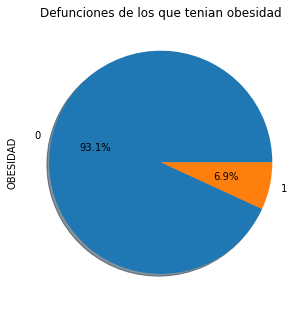

In [56]:
#Grafica que muestra las defunciones por obesidad
df_sobrevivio['OBESIDAD'].plot(kind='pie',
                            figsize= (5,6),
                            autopct='%1.1f%%',
                            startangle=0,
                            shadow=True)
plt.title('Defunciones de los que tenian obesidad')
plt.show()

In [57]:
df_obesidad = corona.groupby('SEXO', axis=0).sum()
df_obesidad.head()

,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI,SOBREVIVIO
SEXO,,,,,,,,,,,,,,,,,,
1,632526,45207942,1037997,22981007,1435158,1162593,1203281,1192032,1217704,1129763,1269744,1206312,1124745,1204866,1190558,912811,45208227,24272
2,665659,41066723,998471,23397033,52696705,1194437,1235076,1229303,1248857,1161204,1320297,1234082,1157217,1232832,1198433,874807,41067779,42893


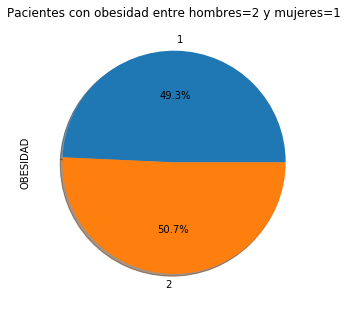

In [58]:
#Grafica que muestra por sexo los pacientes con obesidad
df_obesidad['OBESIDAD'].plot(kind='pie',
                            figsize= (5,6),
                            autopct='%1.1f%%',
                            startangle=0,
                            shadow=True)
plt.title('Pacientes con obesidad entre hombres=2 y mujeres=1')
plt.show()

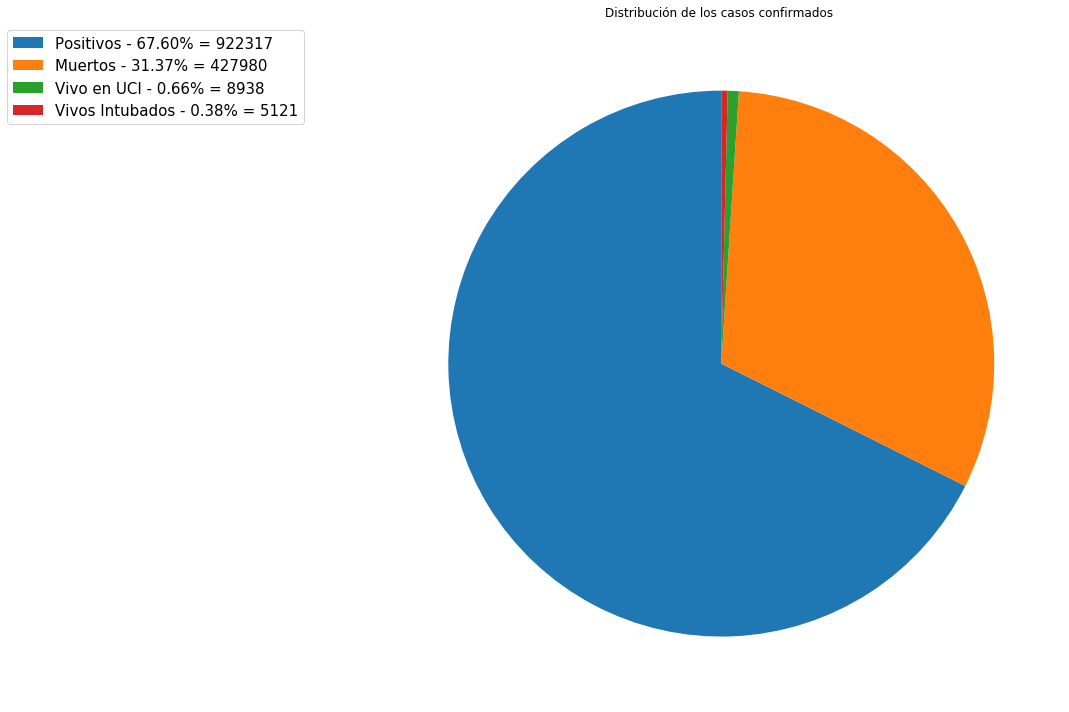

In [59]:
#Grafico que muestra el estado de los casos confirmados ya sea que esten vivos, muertos, en cuidados intensivos o intubados
positivos = len(corona.loc[corona['RESULTADO'] == 1])
muertos = len(corona.loc[(corona['RESULTADO'] == 1) & (corona['SOBREVIVIO'] != 1)])
vivos_UCI = len(corona.loc[(corona['RESULTADO'] == 1) & ((corona['SOBREVIVIO'] == 1) & (corona['INTUBADO'] == 1))])
vivos_intubados = len(corona.loc[(corona['RESULTADO'] == 1) & ((corona['SOBREVIVIO'] == 1) & (corona['UCI'] == 1))])

sizes = np.array([positivos+muertos+vivos_UCI+vivos_intubados, muertos, vivos_UCI,vivos_intubados])
fig, ax1 = plt.subplots(figsize=(20,10))
patches, texts = ax1.pie(sizes,startangle=90, shadow=False)
porcent = 100.*sizes/sizes.sum()
tags = ['Positivos', 'Muertos', 'Vivo en UCI', 'Vivos Intubados']
labels = ['{0} - {1:0.2f}% = {2:0.0f}'.format(tags[x],porcent[x],sizes[x]) for x in range(len(tags))]
ax1.set_title('Distribución de los casos confirmados ')

ax1.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=15)
fig.tight_layout()


### Arbol de Decision

In [60]:
#Verificamos que no hay valores nulos
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091695 entries, 0 to 1091694
Data columns (total 20 columns):
SEXO              1091695 non-null int64
TIPO_PACIENTE     1091695 non-null int64
INTUBADO          1091695 non-null int64
NEUMONIA          1091695 non-null int64
EDAD              1091695 non-null int64
EMBARAZO          1091695 non-null int64
DIABETES          1091695 non-null int64
EPOC              1091695 non-null int64
ASMA              1091695 non-null int64
INMUSUPR          1091695 non-null int64
HIPERTENSION      1091695 non-null int64
OTRA_COM          1091695 non-null int64
CARDIOVASCULAR    1091695 non-null int64
OBESIDAD          1091695 non-null int64
RENAL_CRONICA     1091695 non-null int64
TABAQUISMO        1091695 non-null int64
RESULTADO         1091695 non-null int64
UCI               1091695 non-null int64
SOBREVIVIO        1091695 non-null int64
RangoEdad         1086907 non-null category
dtypes: category(1), int64(19)
memory usage: 159.3 MB


In [61]:
#Objetivo del modelo
#El propósito del modelo es clasificar a las personas infectadas como sobrevivientes o fallecidos.
y_target = corona["SOBREVIVIO"].values

In [62]:
#valores que será la entrada para el modelo 
#Creamos una lista de las columnas a partir de los datos que deseamos que el clasificador utilice como variables de entrada 
#y luego creamos un arreglo con el nombre de la columna de esa variable. La variable X_input contiene los valores para todas 
#las funciones que utilizará el modelo para deducir cómo hacer las clasificaciones
columns = ["SEXO", "EDAD", "EMBARAZO", "INTUBADO" ,"NEUMONIA", "DIABETES","EPOC","ASMA","INMUSUPR","HIPERTENSION","CARDIOVASCULAR",
           "OBESIDAD","RENAL_CRONICA","TABAQUISMO","UCI"]

X_input = corona[list(columns)].values

In [63]:
from sklearn import tree

clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf_train = clf_train.fit(X_input, y_target)

In [64]:
#Utilice el método score() del objeto del árbol de decisiones para mostrar la precisión del 
#porcentaje de las asignaciones realizadas por el clasificador.
clf_train.score(X_input,y_target)

0.9430830039525692

In [65]:
clasificacion=['No Sobrevive', 'Sobrevive']

In [66]:
import sklearn
#from sklearn.externals.six import StringIO
with open("covid19.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names=clasificacion)

In [67]:
!dot -Tpng covid19.dot -o covid19.png

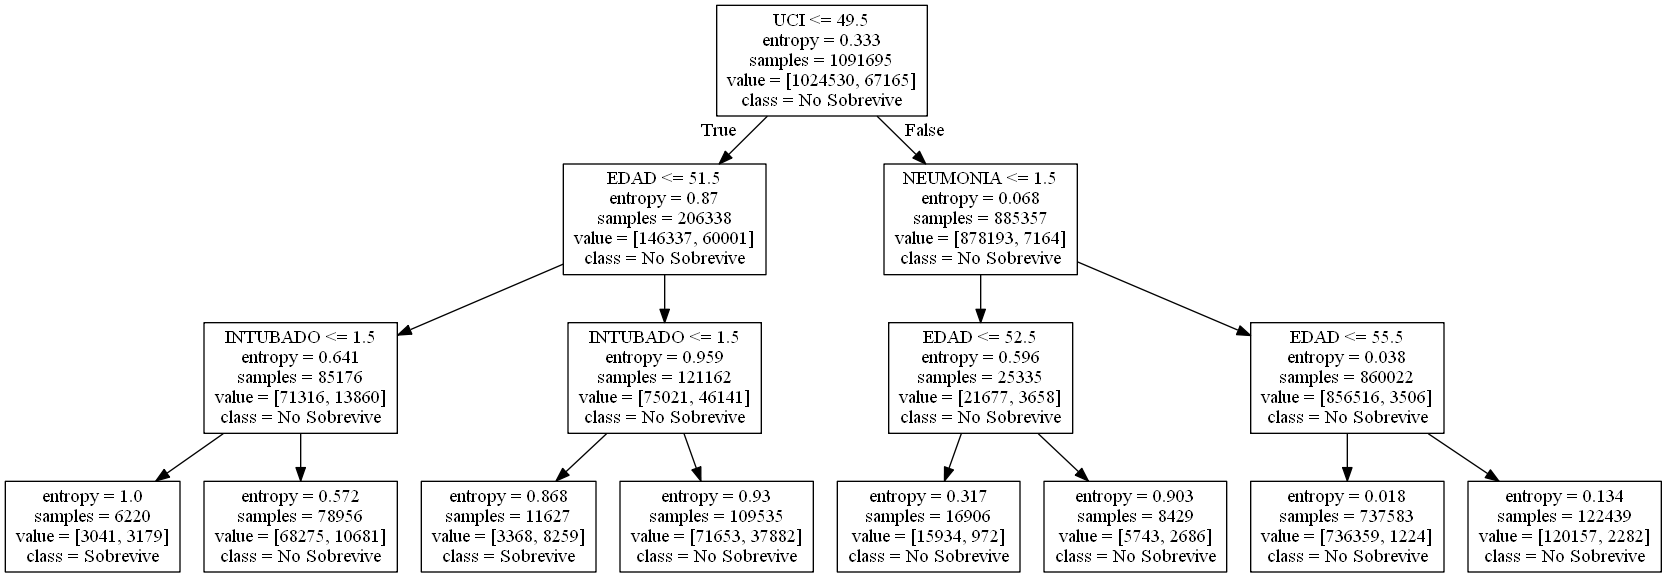

In [68]:
from IPython.display import Image

#display the decison tree graphic
Image("covid19.png")

###### En el árbol podemos ver varias cosas. Primero, en su raíz, está la variable UCI, que indica que es el único factor más importante al realizar la clasificación. En las ramas son la edad y los demas factores como Neumonia e Intubado que son los factores que mas influyen en el covid-19 para la tasa de mortalidad.

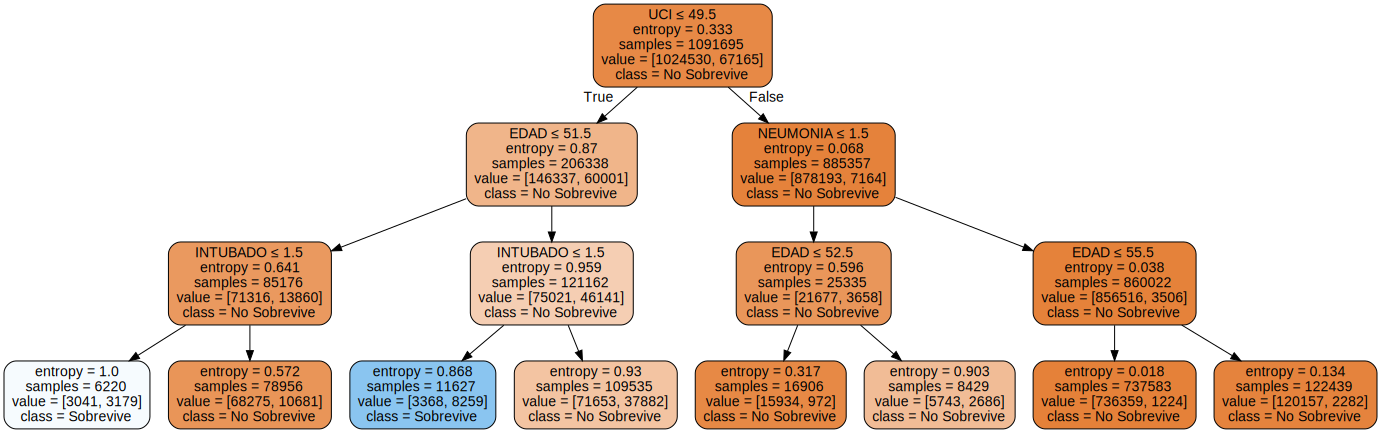

In [69]:
import graphviz
dot_data = tree.export_graphviz(clf_train, out_file=None,   
                         class_names=clasificacion,
                         feature_names=columns,
                         filled=True, rounded=True,
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Covid19Color", format='png')
graph